# Data Understanding

Import Library

In [1]:
import pandas as pd
import numpy as np
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
import numpy as np

# Baca file dengan argumen na_values
df = pd.read_csv('data.csv', na_values=['', ' ', 'NA', 'NaN', 'null', 'None'])
df


,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17.0,12.0,12.0,...,9.0,NaN,NaN,2.0,7.0,7.0,1.0,1.0,0.0,21.254724
1,nfp8122,2,0,1,0,27,NaN,15.0,12.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nfp8122,3,0,1,0,29,NaN,15.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nfp8122,4,0,1,0,27,NaN,15.0,12.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nfp8122,5,0,1,0,28,NaN,16.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,7,1,1,0,29,NaN,19.0,10.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,nfp8334,8,1,1,0,28,NaN,17.0,11.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,nfp8334,9,1,1,0,28,NaN,16.0,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663,nfp8334,10,1,1,1,40,NaN,27.0,13.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ClientID                    1665 non-null   object 
 1   CycleNumber                 1665 non-null   int64  
 2   Group                       1665 non-null   int64  
 3   CycleWithPeakorNot          1665 non-null   int64  
 4   ReproductiveCategory        1665 non-null   int64  
 5   LengthofCycle               1665 non-null   int64  
 6   MeanCycleLength             141 non-null    float64
 7   EstimatedDayofOvulation     1515 non-null   float64
 8   LengthofLutealPhase         1514 non-null   float64
 9   FirstDayofHigh              1407 non-null   float64
 10  TotalNumberofHighDays       1653 non-null   float64
 11  TotalHighPostPeak           1662 non-null   float64
 12  TotalNumberofPeakDays       1649 non-null   float64
 13  TotalDaysofFertility        1634 

In [4]:
# Drop kolom dengan jumlah non-null kurang dari 1200
df = df.drop(columns=[col for col in df.columns if df[col].count() < 1200])

<Figure size 1800x1500 with 0 Axes>

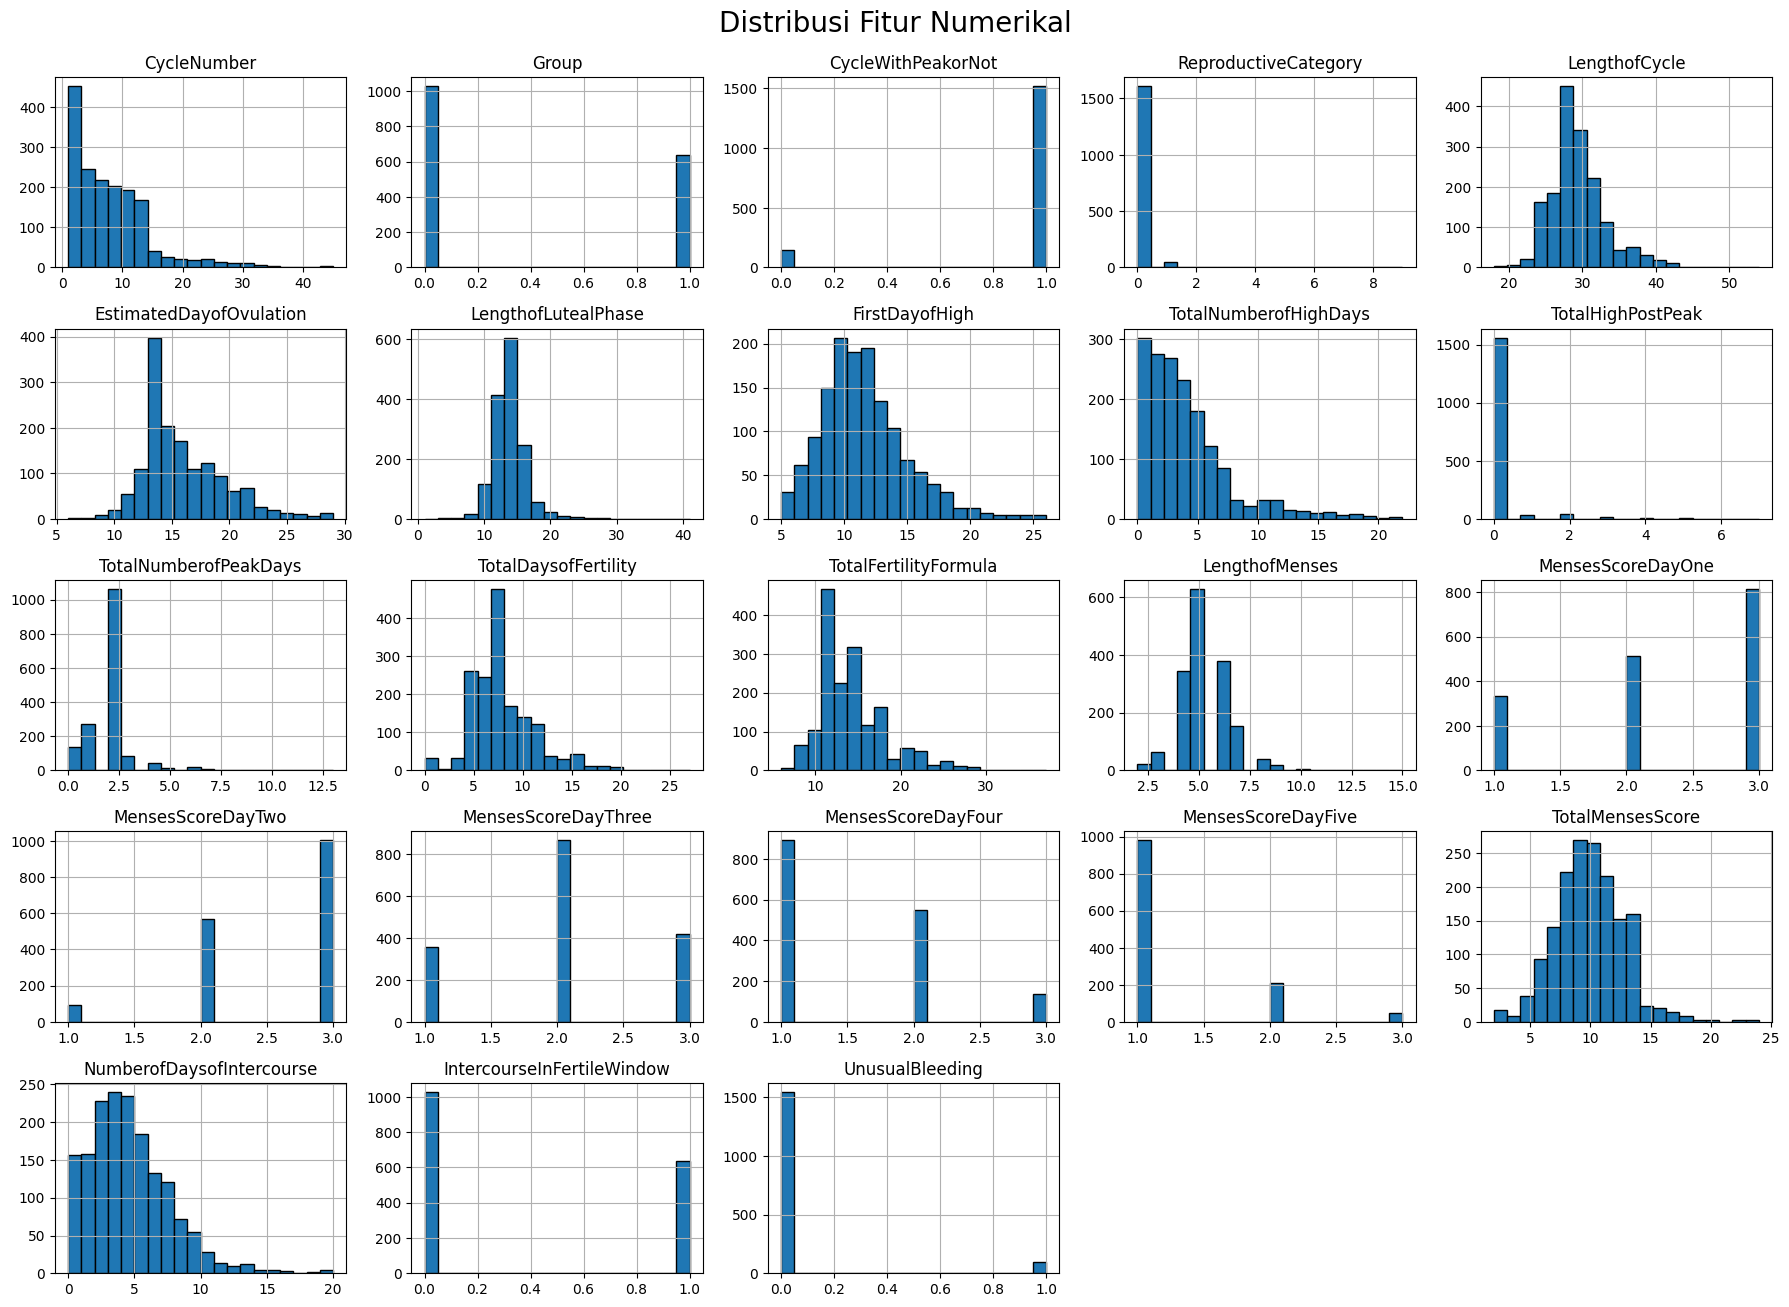

In [5]:
# Pilih kolom numerik
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Tentukan ukuran figure dan grid
plt.figure(figsize=(18, 15))
df[numerical_cols].hist(bins=20, layout=(6, 5), figsize=(18, 15), edgecolor='black')
plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerikal", fontsize=20, y=1.02)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ClientID                    1665 non-null   object 
 1   CycleNumber                 1665 non-null   int64  
 2   Group                       1665 non-null   int64  
 3   CycleWithPeakorNot          1665 non-null   int64  
 4   ReproductiveCategory        1665 non-null   int64  
 5   LengthofCycle               1665 non-null   int64  
 6   EstimatedDayofOvulation     1515 non-null   float64
 7   LengthofLutealPhase         1514 non-null   float64
 8   FirstDayofHigh              1407 non-null   float64
 9   TotalNumberofHighDays       1653 non-null   float64
 10  TotalHighPostPeak           1662 non-null   float64
 11  TotalNumberofPeakDays       1649 non-null   float64
 12  TotalDaysofFertility        1634 non-null   float64
 13  TotalFertilityFormula       1663 

In [7]:
df.nunique()

,0
ClientID,159
CycleNumber,45
Group,2
CycleWithPeakorNot,2
ReproductiveCategory,4
LengthofCycle,32
EstimatedDayofOvulation,23
LengthofLutealPhase,29
FirstDayofHigh,22
TotalNumberofHighDays,23


In [8]:
min_max_df = pd.DataFrame({
    'Min': df.min(numeric_only=True),
    'Max': df.max(numeric_only=True)
})
min_max_df

,Min,Max
CycleNumber,1.0,45.0
Group,0.0,1.0
CycleWithPeakorNot,0.0,1.0
ReproductiveCategory,0.0,9.0
LengthofCycle,18.0,54.0
EstimatedDayofOvulation,6.0,29.0
LengthofLutealPhase,1.0,41.0
FirstDayofHigh,5.0,26.0
TotalNumberofHighDays,0.0,22.0
TotalHighPostPeak,0.0,7.0


DROP NAN DAN KOLOM TIDAK DIGUNAKAN

In [9]:
df.drop(['ClientID', 'CycleNumber', 'ReproductiveCategory'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Group                       941 non-null    int64  
 1   CycleWithPeakorNot          941 non-null    int64  
 2   LengthofCycle               941 non-null    int64  
 3   EstimatedDayofOvulation     941 non-null    float64
 4   LengthofLutealPhase         941 non-null    float64
 5   FirstDayofHigh              941 non-null    float64
 6   TotalNumberofHighDays       941 non-null    float64
 7   TotalHighPostPeak           941 non-null    float64
 8   TotalNumberofPeakDays       941 non-null    float64
 9   TotalDaysofFertility        941 non-null    float64
 10  TotalFertilityFormula       941 non-null    float64
 11  LengthofMenses              941 non-null    float64
 12  MensesScoreDayOne           941 non-null    float64
 13  MensesScoreDayTwo           941 non

In [11]:
np.random.seed(42)

In [12]:
# 1. Tambahkan fitur buatan
df['StressScore'] = np.random.randint(1, 6, len(df))
df['DietScore'] = np.random.randint(1, 6, len(df))
df['MedicalConditionScore'] = np.random.randint(1, 6, len(df))
df['PhysicalActivityScore'] = np.random.randint(1, 6, len(df))

# 2. Ubah target numerik menjadi kategori
def classify_cycle(length):
    if 21 <= length <= 25:
        return 'Normal Pendek'
    elif 26 <= length <= 30:
        return 'Normal Sedang'
    elif 31 <= length <= 35:
        return 'Normal Panjang'
    else:
        return 'Tidak Normal'

df['CycleCategory'] = df['LengthofCycle'].apply(classify_cycle)

In [13]:
# 3. Definisikan fitur dan target klasifikasi
X = df.drop(columns=['LengthofCycle', 'CycleCategory'])
y = df['CycleCategory']

In [14]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [15]:
encoder = LabelEncoder()
y_encoder = encoder.fit_transform(y_smote)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_encoder, random_state=42, stratify=y_encoder)

In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Confusion Matrix ===
[[125   0   5   4]
 [  0 133   1   0]
 [  5   2 127   0]
 [  0   0   1 133]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       134
           1       0.99      0.99      0.99       134
           2       0.95      0.95      0.95       134
           3       0.97      0.99      0.98       134

    accuracy                           0.97       536
   macro avg       0.97      0.97      0.97       536
weighted avg       0.97      0.97      0.97       536



In [18]:
joblib.dump(model, 'model.pkl')
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']